# Introduction
Software company that sells 14 types of software for various industrial needs (B2B) globally to various segments that want to increase profits by 2024.

## Rumusan Masalah :
Bagaimana cara mengurangi penjualan yang merugikan dan meningkatkan penjualan yang menguntungkan sehingga profit perusahaan dapat meningkat ditahun 2024

## Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Dataset ini berisi informasi terkait customer, region dan sales penjualan perusahaan selama 4 tahun kebelakang (2020 - 2023). Ada 19 kolom di dalam dataset SaaS_Sales, yaitu:

1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction

Berikut 5 baris teratas dan terbawah dari dataset SaaS_Sales.

In [3]:
df = pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## Data Understanding & Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset SaaS_Sales.

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

In [5]:
df.isnull().any().any().sum()

0

In [6]:
duplicate_rows = df[df.duplicated()]

# Menampilkan jumlah total data duplikat
total_duplicate_rows = duplicate_rows.shape[0]
print("Jumlah total data duplikat:", total_duplicate_rows)

# Menampilkan data duplikat
print("Data Duplikat:")
duplicate_rows

Jumlah total data duplikat: 0
Data Duplikat:


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [7]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [8]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11876\3657208298.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

Secara umum, kita bisa melihat bahwa:
* dataset SaaS_Sales memiliki 19 kolom dan 9.994 baris
* tidak terdapat data kosong
* tidak terdapat data duplicate

#### Missing Value

In [9]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

Karena data tidak memiliki kekosongan, duplikasi, dan secara domain seluruh data telah memenuhi kaidahnya. Maka selanjutnya akan dilakukan analisa data dengan data yang utuh atau sama yaitu, 19 kolom dan 9994 baris data.

## Data Analyst

Untuk mencari transaksi yang cenderung merugikan perusahaan maka dilakukan analisis pada fitur profit. kita akan mencari dari ***consumer negara mana saja yang mencetak transaksi merugikan.***

Analisis akan dilakukan pada beberapa variable data.
untuk analisis pertama akan dilakukan pada variable diskon. kita mengalisis terlebih dahulu **korelasi diskon terhadap profit 
& sales**

sebelum mengetahui nilai korelasi, ***dilakukan terlebih dahulu tes normalitas kolmogorov-smirnov. tes KS dipilih karena cocok untuk sampel berukuran besar & lebih sensitif terhadap perbedaan di ekor distribusi***. 

Setelah diketahui apakah data terdistribusi normal atau tidak, bisa dilakukan analisis korelasi yang tepat yaitu korelasi pearson jika data terdistribusi normal atau korelasi spearman jika distribusi data tidak normal

In [10]:
# membuat tabel baru yang hanya berisi data kuntitatif untuk pengujian
x = df.drop(columns=['Row ID', 'Order ID','Order Date','Contact Name','Country','City','Region','Subregion', 'Customer','Industry','Segment','Product','License','Date Key','Customer ID'])

In [11]:
from scipy.stats import kstest

for column in x:
    # y = kstest(x[column], 'norm')
    ks_statistic, ks_pvalue = kstest(x[column], 'norm')
    
    if ks_pvalue > 0.05:
        print(f'p-value of {column} : {ks_pvalue:.5f}. So, Normal Distribution')
    else:
        print(f'p-value of {column} : {ks_pvalue:.5f}. So, NOT Normal Distribution')

p-value of Sales : 0.00000. So, NOT Normal Distribution
p-value of Quantity : 0.00000. So, NOT Normal Distribution
p-value of Discount : 0.00000. So, NOT Normal Distribution
p-value of Profit : 0.00000. So, NOT Normal Distribution


Karena penyebaran data tidak ada yang normal maka dipilih tes korelasi non-parametrik spearman

In [12]:
x.corr(method='spearman')

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.327426,-0.056969,0.518407
Quantity,0.327426,1.000000,-0.000878,0.234491
Discount,-0.056969,-0.000878,1.000000,-0.543350
Profit,0.518407,0.234491,-0.543350,1.000000


Dari Cross tabulation diatas dapat diinterpretasikan sebagai berikut :

Discount & Sales (-0.056969):
    Korelasi negatif kecil (-0.06) antara Sales dan Discount. Ini menunjukkan bahwa ada hubungan negatif kecil antara penjualan 
    (Sales) dan besaran diskon yang diberikan (Discount), tetapi hubungan ini tidak kuat.

Discount & Quantity (-0.000878):
    Korelasi yang sangat kecil dan mendekati nol antara Quantity dan Discount. Ini menunjukkan bahwa tidak ada hubungan linear 
    yang signifikan antara kuantitas barang yang terjual dan besaran diskon.

Discount & Profit (-0.543350):
    Korelasi negatif yang cukup kuat (-0.54) antara Discount dan Profit. Ini menunjukkan bahwa besaran diskon yang tinggi dapat 
    berkorelasi negatif dengan keuntungan, yang berarti memberikan diskon besar tidak selalu berdampak positif pada 
    profitabilitas.

Dari Analisis tersebut kita akan mencari negara yang memiliki discount terbanyak beserta profit yang dihasilkan

In [13]:
df_dsct = df[['Country','Discount','Profit']].sort_values(by='Discount')
df_dsct_total = df_dsct.groupby('Country')[['Discount','Profit']].sum()
df_dsct_total_sorted = df_dsct_total.sort_values(by='Discount', ascending=False).head(12).reset_index()
df_dsct_total_sorted

,Country,Discount,Profit
0,Japan,364.64,-25729.3563
1,France,192.90,-15559.9603
2,Australia,191.90,-12607.8870
3,Mexico,152.40,-16971.3766
4,United States,145.60,76381.3871
5,Germany,114.65,-3399.3017
6,Sweden,70.60,-7490.9122
7,Chile,68.00,-3427.9246
8,United Kingdom,62.40,74989.0891
9,Russia,57.60,-6527.8579


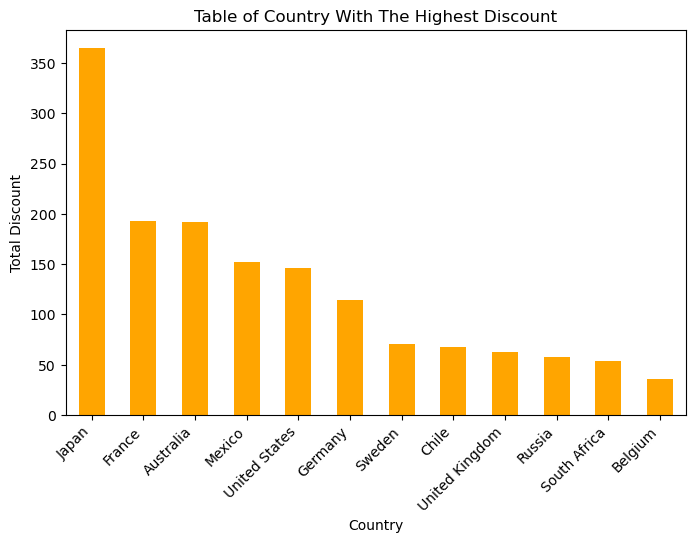

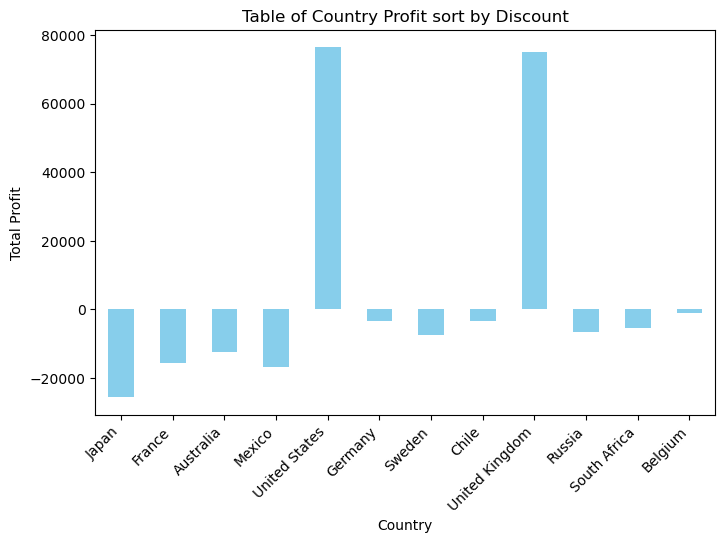

In [14]:
ax = df_dsct_total_sorted['Discount'].plot(kind='bar', figsize=(8, 5), color='orange')
ax.set_xticklabels(df_dsct_total_sorted['Country'], rotation=45, ha='right')
plt.title('Table of Country With The Highest Discount')
plt.xlabel('Country')
plt.ylabel('Total Discount')
plt.show()

ax = df_dsct_total_sorted['Profit'].plot(kind='bar', figsize=(8, 5), color='skyblue')
ax.set_xticklabels(df_dsct_total_sorted['Country'], rotation=45, ha='right')
plt.title('Table of Country Profit sort by Discount')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.show()

Dari dua table diatas kita bisa melihat bahwa 8 dari 10 negara dengan diskon tertinggi mengalami kerugian profit. Terutama negara Jepang, disisi lain Jepang adalah negara penerima discount  terbesar pada 4 tahun operasional. untuk mengetahui lebih lanjut kita akan melihat produk apa saja memiliki profit terendah di negara Jepang. 

In [15]:
selected = ['Japan']
filter_selected = df['Country'].isin(selected)
filter_df = df[filter_selected]

df_lp = filter_df[['Country','Product','Profit']].sort_values(by='Profit')
df_lp_total = df_lp.groupby(['Country','Product'])[['Profit']].sum()
df_lp_total_sorted = df_lp_total.sort_values(by='Profit', ascending=True).head(12).reset_index()
df_lp_total_sorted
print(df_lp_total_sorted.to_string(index=False))
print()

y = df[df['Profit'] < 0]
y_avg = y['Profit'].mean()
print("untuk kerugian besar, nilainya lebih dari", y_avg)

Country                    Product      Profit
  Japan             ContactMatcher -16921.7504
  Japan                    OneView  -6147.2225
  Japan        SaaS Connector Pack  -3312.6786
  Japan            Big Ol Database  -2666.8434
  Japan            Marketing Suite  -2391.1377
  Japan                 FinanceHub  -2315.2470
  Japan     Marketing Suite - Gold   -763.7054
  Japan                    Storage     80.7357
  Japan             ChatBot Plugin    316.3538
  Japan SaaS Connector Pack - Gold    848.1760
  Japan               Data Smasher   1105.8501
  Japan                    Support   1585.6908

untuk kerugian besar, nilainya lebih dari -83.44804152859435


Dari Table diatas, 6 dari 11 product yang dijual di Jepang mengalami kerugian. dan semua kerugian yang dialami dijepang masuk dalam kategori kerugian besar karena diatas rata-rata kerugian penjualan product secara umum.

In [35]:
# Melihat fitur data banyaknya penjualan (Count Sales) dan diskon pada negara jepang dari 2020-2023 
df_copy = df.copy()

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Memilih satu negara (misalnya, Jepang)
selected_country = 'Japan'
selected_year = [2020,2021,2022,2023]

resultSales = []
resultDisc = []

# Membuat filter berdasarkan tahun dan negara pada DataFrame
for i in selected_year:
    filter_df = df[(df['Order Date'].dt.year == i) & (df['Country'] == selected_country)]
    resultSales.append(filter_df['Sales'].count())
    
    filter_df = df[(df['Order Date'].dt.year == i) & (df['Country'] == selected_country)]
    resultDisc.append(round(filter_df['Discount'].sum()))

#print(resultSales)
#type(resultSales[0])
#print(resultDisc)
#type(resultDisc[0])
# Menampilkan hasil
# print(filter_df['Sales'].count())

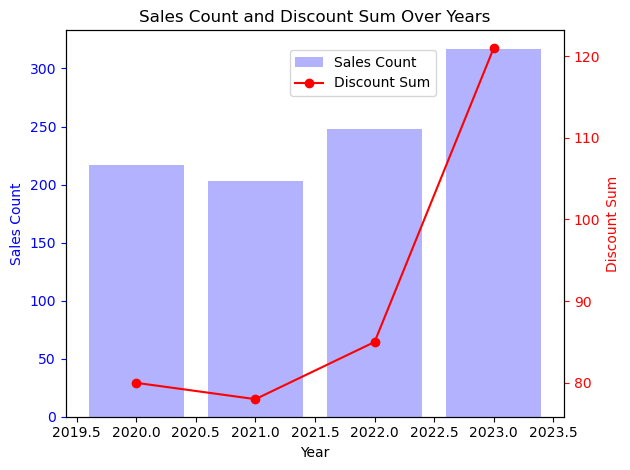

In [17]:
fig, ax1 = plt.subplots()

# Bar chart untuk Sales count
ax1.bar(selected_year, resultSales, color='b', alpha=0.3, label='Sales Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales Count', color='b')
ax1.tick_params('y', colors='b')

# Line chart untuk Discount sum
ax2 = ax1.twinx()
ax2.plot(selected_year, resultDisc, color='r', marker='o', label='Discount Sum')
ax2.set_ylabel('Discount Sum', color='r')
ax2.tick_params('y', colors='r')

# Menambahkan judul dan legend
plt.title('Sales Count and Discount Sum Over Years')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.7, 0.9))

# Menampilkan plot
plt.show()

jika dilihat dari pola data diatas dapat diartikan bahwa ketika diskon naik retensi pembelian juga ikut naik, dan ketika diskon turun retensi pembelian juga ikut turun. Hal tersebut mengindikasikan bahwa pembelian terjadi ***bukan karena repeat order*** melaikkan harga yang turun atau adanya discount.

### Analisis Produk yang Potensial untuk Meningkatkan Profit

Selain dengan menekan kerugian, hal sebaliknya juga dilakukan yaitu meningkatkan keuntungan. langkah selanjutnya yang dilakukan adalah mengindetifikasi produk yang potensial, yaitu produk yang memiliki retensi pembelian rendah tetapi menghasilkan profit yang tinggi.

In [18]:
# mencari data produk yang memiliki penjualan rendah tapi mencetak prodit tinggi
df['Sales Count'] = df.groupby('Product')['Sales'].transform('count')

# Membuat DataFrame df_prof_group
df_prof = df[['Product', 'Sales Count', 'Profit']].sort_values(by='Profit')
df_prof_group = df_prof.groupby('Product')[['Profit', 'Sales Count']].sum().sort_values(by='Sales Count')
#df_prof_group

# Menghitung rata-rata Profit dan Sales Count
average_profit = df_prof_group['Profit'].mean()
average_sc = df_prof_group['Sales Count'].mean()

# Memfilter produk yang memiliki Profit dan Sales Count di atas rata-rata masing-masing
filtered_prof_sc_group = df_prof_group[(df_prof_group['Profit'] > average_profit) & (df_prof_group['Sales Count'] < average_sc)]

filtered_prof_sc_group

,Profit,Sales Count
Product,,
Alchemy,55617.8249,4624
Data Smasher,41936.6357,600625
Marketing Suite - Gold,21278.8264,715716


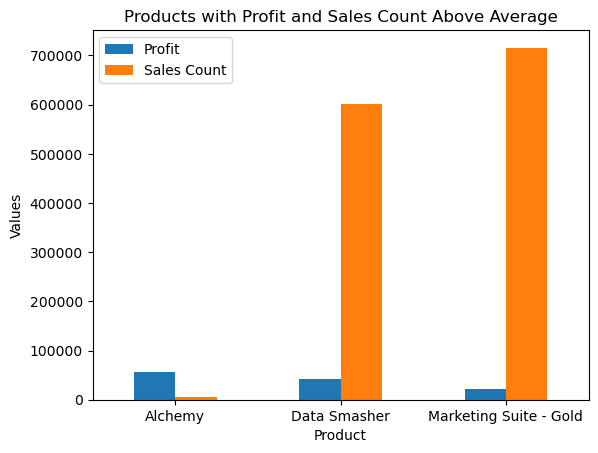

In [19]:
filtered_prof_sc_group.plot(kind='bar', y=['Profit','Sales Count'], rot=0)
plt.title('Products with Profit and Sales Count Above Average')
plt.xlabel('Product')
plt.ylabel('Values')
plt.show()

Dari grafik bar plot diatas bisa dilihat bahwa alchemy merupakan satu-satunya product yang memberikan profit diatas rata-rata serta lebih banyak dari kuantitas penjualan

In [20]:
#cek dimana Banyak penjualan lebih 
filtered_plus_prof_sc_group = df_prof_group[(df_prof_group['Profit'] > df_prof_group['Sales Count'])]
filtered_plus_prof_sc_group

,Profit,Sales Count
Product,,
Alchemy,55617.8249,4624


Dari Grafik & Tabel diatas dapat dilihat bahwa Alchemy merupakan satu-satunya product yang mencetak lebih banyak profit ketimbang kuantitas penjualan. Untuk produk Data Smasher & Marketing Suits - Gold, meski mencetak laba tinggi tetapi masih membutuhkan banyak penjualan.

### Analisis Customer yang Potensial untuk Meningkatkan Profit

In [36]:
# mencari customer yang memiliki kuantitas permintaan yang rendah tetapi menghasilkan profit tinggi

df_quan = df.groupby('Customer')[['Customer','Profit','Quantity']].sum().sort_values(by='Profit')

threshold_profit = 100
average_profit = df_quan['Profit'].mean()
threshold_profit_final = average_profit * (threshold_profit / 100)

threshold_quantity = 93
average_quantity = df_quan['Quantity'].mean()
threshold_quantity_final = average_quantity * (threshold_quantity / 100)

df_quan_filter = df_quan[(df_quan['Profit'] > threshold_profit_final) & (df_quan['Quantity'] < threshold_quantity_final)].sort_values(by='Quantity')

df_quan_filter_round = round(df_quan_filter)
df_quan_filter_round

,Profit,Quantity
Customer,,
Alphabet,3980.0,181
Glencore,4470.0,220
Coca-Cola,9449.0,305
Sysco,3383.0,318
Phillips 66,5260.0,326
United Parcel Service,5276.0,344
Apple,3627.0,350


In [33]:
df_quan_filter_reset = df_quan_filter_round.reset_index()

fig = px.scatter(
    df_quan_filter_reset,
    x='Profit',
    y='Quantity',
    size='Profit',
    color='Customer',
    template='plotly_white',
    title='Packed Bubble Chart',
    text='Customer'
)

fig.update_traces(marker=dict(size=6 * fig.data[0].marker.size))
# Menampilkan chart
fig.show()

Dari grafik scatterplot diatas alphabet adalah customer yang paling sedikit membeli quantity barang tetapi memberikan profit diatas rata-rata

## Kesimpulan

Dari analisis yang telah dilakukan, dapat disimpulkan bahwa :

1. Jepang merupakan negara yang memiliki kerugian terbesar dibanding negara-negara lainnya, hal tersebut dikarenakan penjualan produk Contact Matcher, OneView, SaaS Connector, Big OI Database, Marketing Suite, FinanceHub, & Marketing Suite Gold.

2. Discount yang diberlakukan pada produk-produk di negara jepang tidak menghasilkan repeat order dari customer. Hal tersebut dapat membahayakan perusahaan dalam jangka panjang karena akan mengakibatkan kerugian finansial. 

3. Produk Alchemy secara global adalah produk yang paling profitable karena dapat menghasilkan profit diatas rata-rata dengan jumlah penjualan yang sedikit / dibawah rata-rata. dapat diartika setiap transaksi yang dilakukan memberikan profit yang tinggi

4. Terdapat 7 Customer yang memberikan profit diatas rata-rata tetapi quantitas barang yang dibeli sangat sedikit yaitu Alphabet, Glencore, Coca-Cola, Sysco, Philip 66, United Parcel Service, & Apple.


## Rekomendasi

1. untuk mengurangi kerugian perusahaan harus mengurangi atau menghentikan discount di negara jepang untuk produk Contact Matcher, OneView, SaaS Connector, Big OI Database, Marketing Suite, FinanceHub, & Marketing Suite Gold.

2. Budged diskon negara jepang lebih baik dialokasikanpada pembuatan produk yang lebih berkualiatas atau cocok dengan selera pasar di jepang, sehingga di masa depan ketika produk sudah siap dijual maka dilakukan kembali penetrasi pasar (baik secara masif atau parsial) menyesuaikan keadaan pasar di masa tersebut.

3. Untuk Produk Alchemy akan lebih baik jika diskon produk tersebut ditingkatkan sehingga permintaan dapat meningkat, harapannya dalam jangka panjang dapat menguasai capital market yang lebih luas.

4. Para consumer yang telah menghasilkan profit tinggi sebaiknya diberi kelas khusus untuk mendapatkan diskon atau pelayanan tersendiri. sehingga kedepannya repeat order para consumer tersebut dapat lebih awet.